# Framingham Heart Study Dataset

The dataset can be found [here](https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset).

The dataset consists of the following parameters:
1. male	
2. age	
3. education	
4. currentSmoker	
5. cigsPerDay	
6. BPMeds
7. prevalentStroke	
8. prevalentHyp	
9. diabetes	
10. totChol	
11. sysBP	
12. diaBP	
13. BMI	
14. heartRate	
15. glucose	
16. TenYearCHD

Based on the medical history, we would like to predict whether the patient would have a Chronic Heart Disease or not in 10 years.

The dataset is imbalanced and thus, oversampling and undersampling techniques have been applied to understand their effects on the ROC Curve.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Uploaded/Framingham Heart Study Dataset/framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.shape

(4240, 16)

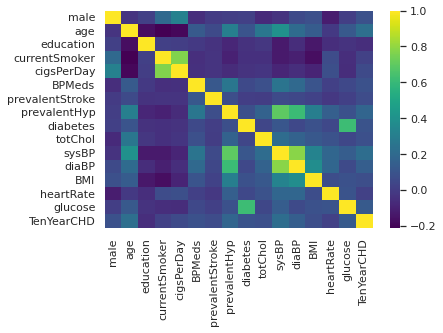

In [4]:
sns.heatmap(data.corr(), cmap = 'viridis')

There exists some correlation between *cigsPerDay* and *currentSmoker*; this makes sense. There is also some degree of correlation between *diabetes* and *glucose* as well as between *prevalentHyp* and *sysBP and diaBP*.

Heart Disease do not depend on the Education. We hence drop it.

In [5]:
data.drop('education', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


## Preprocessing

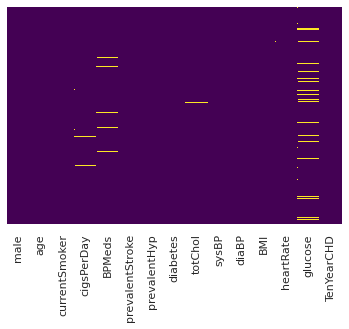

In [6]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [7]:
data['cigsPerDay'].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

We replace the missing values in *Cigarettes Per Day* column with its mode:

In [8]:
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mode()[0])

In [9]:
data['BPMeds'].unique()

array([ 0.,  1., nan])

We replace the missing values in *BPMeds* column with its mode:

In [10]:
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])

In [11]:
data['totChol'].unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
       272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
        nan, 311., 208., 252., 261., 179., 194., 267., 216., 240., 266.,
       255., 220., 235., 212., 223., 300., 302., 248., 200., 189., 258.,
       202., 213., 183., 274., 170., 210., 197., 326., 188., 256., 244.,
       193., 239., 296., 269., 275., 268., 265., 173., 273., 290., 278.,
       264., 282., 241., 288., 222., 303., 246., 150., 187., 286., 154.,
       279., 293., 259., 219., 230., 320., 312., 165., 159., 174., 242.,
       301., 167., 308., 325., 229., 236., 224., 253., 464., 171., 186.,
       227., 249., 176., 163., 191., 263., 196., 310., 164., 135., 238.,
       207., 342., 287., 182., 352., 284., 217., 203., 262., 129., 155.,
       323., 206., 283., 319., 304., 340., 328., 280., 368., 218., 276.,
       339., 231., 198., 177., 201., 277., 184., 19

We replace the missing values in *totChol* column with its mean:

In [12]:
data['totChol'] = data['totChol'].fillna(data['totChol'].mean())

In [13]:
data['glucose'].unique()

array([ 77.,  76.,  70., 103.,  85.,  99.,  78.,  79.,  88.,  61.,  64.,
        84.,  nan,  72.,  89.,  65., 113.,  75.,  83.,  66.,  74.,  63.,
        87., 225.,  90.,  80., 100., 215.,  98.,  62.,  95.,  94.,  55.,
        82.,  93.,  73.,  45., 202.,  68.,  97., 104.,  96., 126., 120.,
       105.,  71.,  56.,  60., 117., 102.,  58.,  92., 109.,  86., 107.,
        54.,  67.,  69.,  57.,  91., 132., 150.,  59.,  81., 115., 140.,
       112., 118., 143., 114., 160., 110., 123., 108., 145., 122., 137.,
       106., 127., 205., 130., 101.,  47.,  53., 216., 163., 144., 116.,
       121., 172., 124., 111.,  40., 186., 223., 325.,  44., 156., 268.,
        50., 274., 292., 255., 136., 206., 131., 148., 297.,  43., 173.,
        48., 386., 155., 147., 170.,  52., 320., 254., 394., 270., 244.,
       183., 142., 119., 135., 167., 207., 129., 177., 250., 294., 166.,
       125., 332., 368., 348., 248., 370., 193., 191., 256., 235., 210.,
       260.])

We replace the missing values in *glucose* column with its mean:

In [14]:
data['glucose'] = data['glucose'].fillna(data['glucose'].mean())

Check the missing values using *isnull* method; we cannot see smaller missing values on the heatmap.

In [15]:
data.isnull().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

We first check if the values in the column *BMI* is continuous or discrete:

In [16]:
data['BMI'].value_counts()

22.91    18
23.48    18
22.54    18
22.19    18
25.09    16
         ..
29.14     1
38.43     1
42.15     1
28.10     1
20.91     1
Name: BMI, Length: 1364, dtype: int64

We replace the missing values in *BMI* column with its mean:

In [17]:
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

In [18]:
data['heartRate'].unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  90.,  96.,  68.,  63.,  88.,
        78.,  83., 100.,  67.,  84.,  57.,  50.,  74.,  86.,  55.,  92.,
        66.,  87., 110.,  81.,  56.,  89.,  82.,  48., 105.,  61.,  54.,
        69.,  52.,  94., 140., 130.,  58., 108., 104.,  91.,  53.,  nan,
       106.,  59.,  51., 102., 107., 112., 125., 103.,  44.,  47.,  45.,
        97., 122., 120.,  99., 115., 143., 101.,  46.])

We replace the missing values in *heartRate* column with its mean:

In [19]:
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].mean())

In [20]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

The missing values are handled.

Check the Target variable:

In [21]:
data['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

The dataset is unbalanced. We have to balance the dataset; we will need to check the performance before and after balancing the dataset.

## Split into Features and Targets

In [22]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Feature Selection

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

In [24]:
X_features = SelectKBest(chi2).fit(x, y)

In [25]:
cols = x.columns
score_df = pd.DataFrame({'Features': cols, 'Score': X_features.scores_}).sort_values('Score', ascending=False)
score_df

,Features,Score
9,sysBP,727.935535
13,glucose,391.151105
1,age,319.266019
8,totChol,235.502392
3,cigsPerDay,231.669558
10,diaBP,152.748563
6,prevalentHyp,92.048736
7,diabetes,39.144944
4,BPMeds,30.759595
0,male,18.899930


In [26]:
X_features = SelectKBest(chi2, k=9)
X_transform = X_features.fit_transform(x, y)

In [27]:
x.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [28]:
filter = X_features.get_support()
print(x.columns[filter])
filtered_x = x.columns[filter]

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'glucose'],
      dtype='object')


In [29]:
filtered_x = np.array(x.columns[filter])
data_copy = data.copy()
for col in data_copy.columns:
  if col not in filtered_x:
    data_copy.drop(col, axis = 1, inplace = True)
data_copy.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'glucose'],
      dtype='object')

In [30]:
data_copy.head()

,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose
0,39,0.0,0.0,0,0,195.0,106.0,70.0,77.0
1,46,0.0,0.0,0,0,250.0,121.0,81.0,76.0
2,48,20.0,0.0,0,0,245.0,127.5,80.0,70.0
3,61,30.0,0.0,1,0,225.0,150.0,95.0,103.0
4,46,23.0,0.0,0,0,285.0,130.0,84.0,85.0


In [31]:
data_copy.shape

(4240, 9)

## Split into Features and Targets

In [32]:
x = data_copy.values
y = data.iloc[:, -1].values

## Split into Test and Train Sets

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('Shape x_train: ', x_train.shape)
print('Shape x_test: ', x_test.shape)
print('Shape y_train: ', y_train.shape)
print('Shape y_test: ', y_test.shape)

Shape x_train:  (3392, 9)
Shape x_test:  (848, 9)
Shape y_train:  (3392,)
Shape y_test:  (848,)


## Standardization

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## ML Techniques - Imbalanced Dataset





In [35]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_curve, f1_score

### k-Nearest Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [37]:
y_pred_kNN = kNN.predict(x_test)

In [38]:
y_pred_kNN_train = kNN.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_kNN_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_kNN))

Accuracy of training data:  0.8691037735849056
Accuracy of testing data:  0.8360849056603774


In [39]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       725
           1       0.25      0.07      0.10       123

    accuracy                           0.84       848
   macro avg       0.55      0.52      0.51       848
weighted avg       0.77      0.84      0.79       848



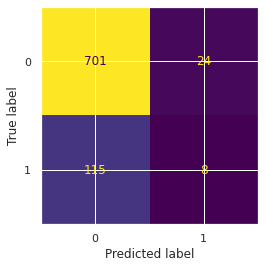

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_kNN, colorbar=False)

We immediately note that the false negatives is high, and the resulting F1 score is very low. This classifier predicts the '0' class (or the *No heart disease* class) accurately but fail to predict correctly if there actually is a heart disease. 

This goes on to show the importance of balancing the dataset.

### Support Vector Machine

In [41]:
from sklearn.svm import SVC
support_vector_classifier = SVC()
support_vector_classifier.fit(x_train, y_train)
support_vector_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [42]:
y_pred_SVC = support_vector_classifier.predict(x_test)

In [43]:
y_pred_SVC_train = support_vector_classifier.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_SVC_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_SVC))

Accuracy of training data:  0.8555424528301887
Accuracy of testing data:  0.8537735849056604


In [44]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       725
           1       0.00      0.00      0.00       123

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848



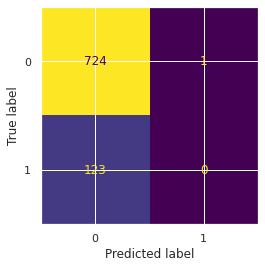

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVC, colorbar=False)

The Support Vector Classifier performs worse than kNN in terms of F1-score. We continue with other algorithms.

### Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
Gaussian = GaussianNB()
Gaussian.fit(x_train, y_train)
Gaussian.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [47]:
y_pred_Gaussian = Gaussian.predict(x_test)

In [48]:
y_pred_Gaussian_train = Gaussian.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_Gaussian_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_Gaussian))

Accuracy of training data:  0.8172169811320755
Accuracy of testing data:  0.8337264150943396


In [49]:
print(classification_report(y_test, y_pred_Gaussian))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       725
           1       0.36      0.20      0.25       123

    accuracy                           0.83       848
   macro avg       0.62      0.57      0.58       848
weighted avg       0.80      0.83      0.81       848



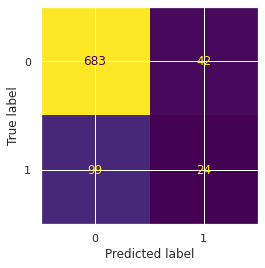

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_Gaussian, colorbar=False)

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
y_pred_log_reg = log_reg.predict(x_test)

In [53]:
y_pred_log_reg_train = log_reg.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_log_reg_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_log_reg))

Accuracy of training data:  0.8537735849056604
Accuracy of testing data:  0.8573113207547169


In [54]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.60      0.05      0.09       123

    accuracy                           0.86       848
   macro avg       0.73      0.52      0.51       848
weighted avg       0.82      0.86      0.80       848



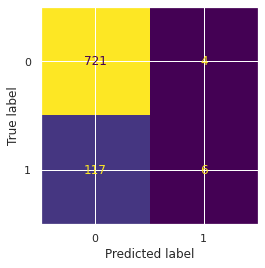

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_reg, colorbar=False)

### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(random_state = 42)
DT_classifier.fit(x_train, y_train)
DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [57]:
y_pred_DT = DT_classifier.predict(x_test)

In [58]:
y_pred_DT_train = DT_classifier.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_DT_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_DT))

Accuracy of training data:  1.0
Accuracy of testing data:  0.7594339622641509


In [59]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       725
           1       0.20      0.23      0.22       123

    accuracy                           0.76       848
   macro avg       0.54      0.54      0.54       848
weighted avg       0.77      0.76      0.76       848



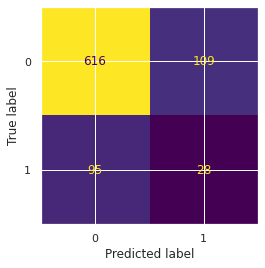

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT, colorbar=False)

### Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(random_state = 42)
RF_classifier.fit(x_train, y_train)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [62]:
y_pred_RF = RF_classifier.predict(x_test)

In [63]:
y_pred_RF_train = RF_classifier.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_RF_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_RF))

Accuracy of training data:  1.0
Accuracy of testing data:  0.8514150943396226


In [64]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       725
           1       0.42      0.07      0.11       123

    accuracy                           0.85       848
   macro avg       0.64      0.52      0.52       848
weighted avg       0.80      0.85      0.80       848



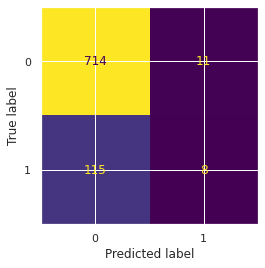

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF, colorbar=False)

# Framingham Heart Study - Balancing the Dataset using ADASYN

We oversample the class using the ADAptive SYNthetic (ADASYN) Sampling Approach: 

In [66]:
from collections import Counter
from imblearn.over_sampling import ADASYN
oversampler = ADASYN()
X, Y = oversampler.fit_resample(x, y)
Counter(Y)

Counter({0: 3596, 1: 3629})

We now have a balanced dataset. We can now split this into training and testing datasets.

## Split into Test and Train Sets

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print('Shape X_train: ', X_train.shape)
print('Shape X_test: ', X_test.shape)
print('Shape Y_train: ', Y_train.shape)
print('Shape Y_test: ', Y_test.shape)

Shape X_train:  (5780, 9)
Shape X_test:  (1445, 9)
Shape Y_train:  (5780,)
Shape Y_test:  (1445,)


## Standardization

In [68]:
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

## ML Techniques - Balanced Dataset

### k-Nearest Neighbours

In [69]:
kNN_balanced = KNeighborsClassifier()
kNN_balanced.fit(X_train, Y_train)
kNN_balanced.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [70]:
Y_pred_kNN = kNN_balanced.predict(X_test)

In [71]:
Y_pred_kNN_train = kNN_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_kNN_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_kNN))

Accuracy of training data:  0.8731833910034602
Accuracy of testing data:  0.8110726643598616


In [72]:
print(classification_report(Y_test, Y_pred_kNN))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79       748
           1       0.74      0.95      0.83       697

    accuracy                           0.81      1445
   macro avg       0.83      0.82      0.81      1445
weighted avg       0.84      0.81      0.81      1445



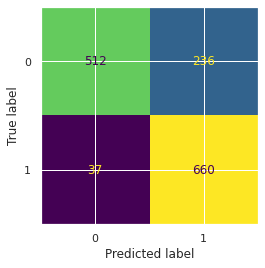

In [73]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_kNN, colorbar=False)

### Support Vector Machine

In [74]:
support_vector_classifier_balanced = SVC()
support_vector_classifier_balanced.fit(X_train, Y_train)
support_vector_classifier_balanced.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [75]:
Y_pred_SVC = support_vector_classifier_balanced.predict(X_test)

In [76]:
Y_pred_SVC_train = support_vector_classifier_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_SVC_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_SVC))

Accuracy of training data:  0.71280276816609
Accuracy of testing data:  0.701038062283737


In [77]:
print(classification_report(Y_test, Y_pred_SVC))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       748
           1       0.67      0.74      0.70       697

    accuracy                           0.70      1445
   macro avg       0.70      0.70      0.70      1445
weighted avg       0.70      0.70      0.70      1445



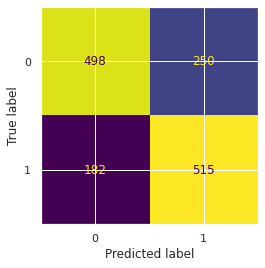

In [78]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_SVC, colorbar=False)

### Naive Bayes

In [79]:
Gaussian_balanced = GaussianNB()
Gaussian_balanced.fit(X_train, Y_train)
Gaussian_balanced.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [80]:
Y_pred_Gaussian = Gaussian_balanced.predict(X_test)

In [81]:
Y_pred_Gaussian_train = Gaussian_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_Gaussian_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_Gaussian))

Accuracy of training data:  0.5935986159169551
Accuracy of testing data:  0.5986159169550173


In [82]:
print(classification_report(Y_test, Y_pred_Gaussian))

              precision    recall  f1-score   support

           0       0.58      0.80      0.67       748
           1       0.64      0.38      0.48       697

    accuracy                           0.60      1445
   macro avg       0.61      0.59      0.58      1445
weighted avg       0.61      0.60      0.58      1445



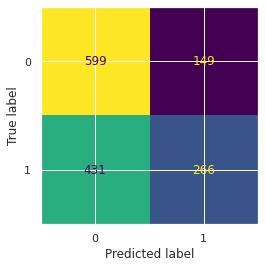

In [83]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_Gaussian, colorbar=False)

### Logistic Regression

In [84]:
log_reg_balanced = LogisticRegression()
log_reg_balanced.fit(X_train, Y_train)
log_reg_balanced.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [85]:
Y_pred_log_reg = log_reg_balanced.predict(X_test)

In [86]:
Y_pred_log_reg_train = log_reg_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_log_reg_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_log_reg))

Accuracy of training data:  0.6468858131487889
Accuracy of testing data:  0.6581314878892733


In [87]:
print(classification_report(Y_test, Y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       748
           1       0.64      0.67      0.66       697

    accuracy                           0.66      1445
   macro avg       0.66      0.66      0.66      1445
weighted avg       0.66      0.66      0.66      1445



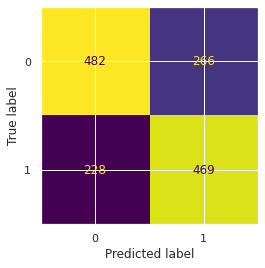

In [88]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_log_reg, colorbar=False)

### Decision Tree Classifier

In [89]:
DT_classifier_balanced = DecisionTreeClassifier(random_state = 42)
DT_classifier_balanced.fit(X_train, Y_train)
DT_classifier_balanced.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [90]:
Y_pred_DT = DT_classifier_balanced.predict(X_test)

In [91]:
Y_pred_DT_train = DT_classifier_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_DT_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_DT))

Accuracy of training data:  1.0
Accuracy of testing data:  0.8006920415224914


In [92]:
print(classification_report(Y_test, Y_pred_DT))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       748
           1       0.78      0.82      0.80       697

    accuracy                           0.80      1445
   macro avg       0.80      0.80      0.80      1445
weighted avg       0.80      0.80      0.80      1445



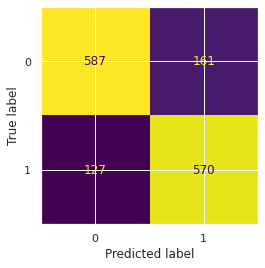

In [93]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_DT, colorbar=False)

### Random Forest Classifier

In [94]:
RF_classifier_balanced = RandomForestClassifier(random_state = 42)
RF_classifier_balanced.fit(X_train, Y_train)
RF_classifier_balanced.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [95]:
Y_pred_RF = RF_classifier_balanced.predict(X_test)

In [96]:
Y_pred_RF_train = RF_classifier_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_RF_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_RF))

Accuracy of training data:  1.0
Accuracy of testing data:  0.8948096885813149


In [97]:
print(classification_report(Y_test, Y_pred_RF))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       748
           1       0.87      0.91      0.89       697

    accuracy                           0.89      1445
   macro avg       0.89      0.90      0.89      1445
weighted avg       0.90      0.89      0.89      1445



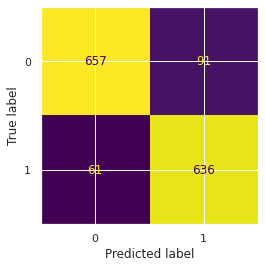

In [98]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_RF, colorbar=False)

# Framingham Heart Study - Balancing the Dataset using SMOTE

We balance the dataset using SMOTE (Synthetic Minoriy Oversampling TEchnique).

In [99]:
from collections import Counter
from imblearn.over_sampling import SMOTE
oversampler_SMOTE = SMOTE()
X_SMOTE, Y_SMOTE = oversampler_SMOTE.fit_resample(x, y)
Counter(Y_SMOTE)

Counter({0: 3596, 1: 3596})

## Split into Test and Train Sets

In [100]:
X_train_SMOTE, X_test_SMOTE, Y_train_SMOTE, Y_test_SMOTE = train_test_split(X_SMOTE, Y_SMOTE, test_size = 0.2, random_state = 42)
print('Shape X_train: ', X_train_SMOTE.shape)
print('Shape X_test: ', X_test_SMOTE.shape)
print('Shape Y_train: ', Y_train_SMOTE.shape)
print('Shape Y_test: ', Y_test_SMOTE.shape)

Shape X_train:  (5753, 9)
Shape X_test:  (1439, 9)
Shape Y_train:  (5753,)
Shape Y_test:  (1439,)


## Standardization

In [101]:
Scaler = StandardScaler()
Scaler.fit(X_train_SMOTE)
X_train_SMOTE = Scaler.transform(X_train_SMOTE)
X_test_SMOTE = Scaler.transform(X_test_SMOTE)

## ML Techniques - Balanced Dataset

### k-Nearest Neighbours

In [102]:
kNN_balanced_SMOTE = KNeighborsClassifier()
kNN_balanced_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
kNN_balanced_SMOTE.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [103]:
Y_pred_kNN_SMOTE = kNN_balanced_SMOTE.predict(X_test_SMOTE)

In [104]:
Y_pred_kNN_SMOTE_train = kNN_balanced_SMOTE.predict(X_train_SMOTE)
print('Accuracy of training data: ', accuracy_score(Y_train_SMOTE, Y_pred_kNN_SMOTE_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_SMOTE, Y_pred_kNN_SMOTE))

Accuracy of training data:  0.8656353207022424
Accuracy of testing data:  0.8116747741487144


In [105]:
print(classification_report(Y_test_SMOTE, Y_pred_kNN_SMOTE))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       745
           1       0.76      0.89      0.82       694

    accuracy                           0.81      1439
   macro avg       0.82      0.81      0.81      1439
weighted avg       0.82      0.81      0.81      1439



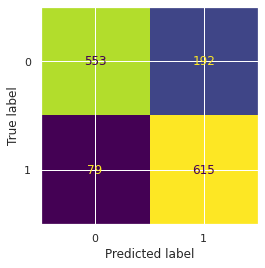

In [106]:
ConfusionMatrixDisplay.from_predictions(Y_test_SMOTE, Y_pred_kNN_SMOTE, colorbar=False)

The F1-score of the kNN Classifier has improved drastically but the precision is still not considerably good. We can check the performance of other algorithms.

### Support Vector Machine

In [107]:
support_vector_classifier_balanced_SMOTE = SVC()
support_vector_classifier_balanced_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
support_vector_classifier_balanced_SMOTE.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [108]:
Y_pred_SVC_SMOTE = support_vector_classifier_balanced_SMOTE.predict(X_test_SMOTE)

In [109]:
Y_pred_SVC_SMOTE_train = support_vector_classifier_balanced_SMOTE.predict(X_train_SMOTE)
print('Accuracy of training data: ', accuracy_score(Y_train_SMOTE, Y_pred_SVC_SMOTE_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_SMOTE, Y_pred_SVC_SMOTE))

Accuracy of training data:  0.7204936554840953
Accuracy of testing data:  0.7136900625434329


In [110]:
print(classification_report(Y_test_SMOTE, Y_pred_SVC_SMOTE))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       745
           1       0.70      0.70      0.70       694

    accuracy                           0.71      1439
   macro avg       0.71      0.71      0.71      1439
weighted avg       0.71      0.71      0.71      1439



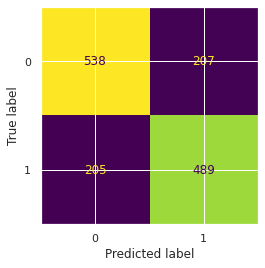

In [111]:
ConfusionMatrixDisplay.from_predictions(Y_test_SMOTE, Y_pred_SVC_SMOTE, colorbar=False)

### Naive Bayes

In [112]:
Gaussian_balanced_SMOTE = GaussianNB()
Gaussian_balanced_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
Gaussian_balanced_SMOTE.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [113]:
Y_pred_Gaussian_SMOTE = Gaussian_balanced_SMOTE.predict(X_test_SMOTE)

In [114]:
Y_pred_Gaussian_SMOTE_train = Gaussian_balanced_SMOTE.predict(X_train_SMOTE)
print('Accuracy of training data: ', accuracy_score(Y_train_SMOTE, Y_pred_Gaussian_SMOTE_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_SMOTE, Y_pred_Gaussian_SMOTE))

Accuracy of training data:  0.6153311315835216
Accuracy of testing data:  0.6108408617095205


In [115]:
print(classification_report(Y_test_SMOTE, Y_pred_Gaussian_SMOTE))

              precision    recall  f1-score   support

           0       0.59      0.84      0.69       745
           1       0.68      0.36      0.47       694

    accuracy                           0.61      1439
   macro avg       0.63      0.60      0.58      1439
weighted avg       0.63      0.61      0.59      1439



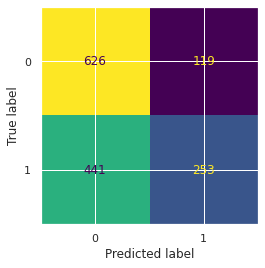

In [116]:
ConfusionMatrixDisplay.from_predictions(Y_test_SMOTE, Y_pred_Gaussian_SMOTE, colorbar=False)

### Logistic Regression

In [117]:
log_reg_balanced_SMOTE = LogisticRegression()
log_reg_balanced_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
log_reg_balanced_SMOTE.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [118]:
Y_pred_log_reg_SMOTE = log_reg_balanced_SMOTE.predict(X_test_SMOTE)

In [119]:
Y_pred_log_reg_SMOTE_train = log_reg_balanced_SMOTE.predict(X_train_SMOTE)
print('Accuracy of training data: ', accuracy_score(Y_train_SMOTE, Y_pred_log_reg_SMOTE_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_SMOTE, Y_pred_log_reg_SMOTE))

Accuracy of training data:  0.6695637058925777
Accuracy of testing data:  0.6643502432244615


In [120]:
print(classification_report(Y_test_SMOTE, Y_pred_log_reg_SMOTE))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       745
           1       0.65      0.67      0.66       694

    accuracy                           0.66      1439
   macro avg       0.66      0.66      0.66      1439
weighted avg       0.66      0.66      0.66      1439



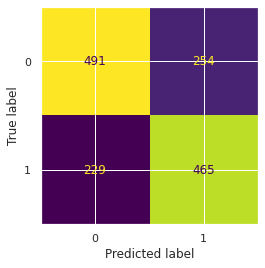

In [121]:
ConfusionMatrixDisplay.from_predictions(Y_test_SMOTE, Y_pred_log_reg_SMOTE, colorbar=False)

### Decision Tree Classifier

In [122]:
DT_classifier_balanced_SMOTE = DecisionTreeClassifier(random_state = 42)
DT_classifier_balanced_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
DT_classifier_balanced_SMOTE.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [123]:
Y_pred_DT_SMOTE = DT_classifier_balanced_SMOTE.predict(X_test_SMOTE)

In [124]:
Y_pred_DT_SMOTE_train = DT_classifier_balanced_SMOTE.predict(X_train_SMOTE)
print('Accuracy of training data: ', accuracy_score(Y_train_SMOTE, Y_pred_DT_SMOTE_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_SMOTE, Y_pred_DT_SMOTE))

Accuracy of training data:  1.0
Accuracy of testing data:  0.7873523280055594


In [125]:
print(classification_report(Y_test_SMOTE, Y_pred_DT_SMOTE))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       745
           1       0.77      0.79      0.78       694

    accuracy                           0.79      1439
   macro avg       0.79      0.79      0.79      1439
weighted avg       0.79      0.79      0.79      1439



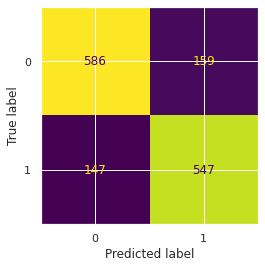

In [126]:
ConfusionMatrixDisplay.from_predictions(Y_test_SMOTE, Y_pred_DT_SMOTE, colorbar=False)

### Random Forest Classifier

In [127]:
RF_classifier_balanced_SMOTE = RandomForestClassifier(random_state = 42)
RF_classifier_balanced_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
RF_classifier_balanced_SMOTE.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [128]:
Y_pred_RF_SMOTE = RF_classifier_balanced_SMOTE.predict(X_test_SMOTE)

In [129]:
Y_pred_RF_SMOTE_train = RF_classifier_balanced_SMOTE.predict(X_train_SMOTE)
print('Accuracy of training data: ', accuracy_score(Y_train_SMOTE, Y_pred_RF_SMOTE_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_SMOTE, Y_pred_RF_SMOTE))

Accuracy of training data:  1.0
Accuracy of testing data:  0.8679638637943016


In [130]:
print(classification_report(Y_test_SMOTE, Y_pred_RF_SMOTE))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       745
           1       0.87      0.85      0.86       694

    accuracy                           0.87      1439
   macro avg       0.87      0.87      0.87      1439
weighted avg       0.87      0.87      0.87      1439



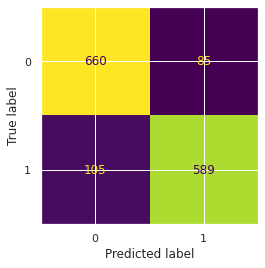

In [131]:
ConfusionMatrixDisplay.from_predictions(Y_test_SMOTE, Y_pred_RF_SMOTE, colorbar=False)

# ROC Curve

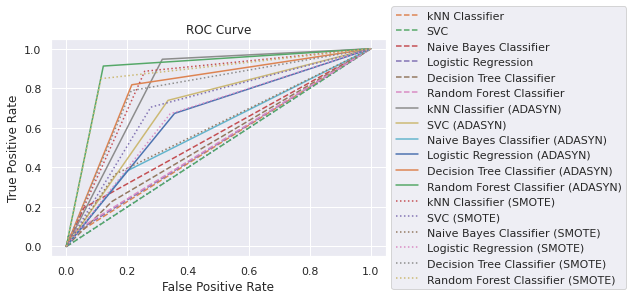

In [132]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr1, tpr1, '--', label='kNN Classifier')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_SVC)
plt.plot(fpr2, tpr2, '--', label='SVC')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_Gaussian)
plt.plot(fpr3, tpr3, '--', label='Naive Bayes Classifier')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_DT)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(y_test, y_pred_RF)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')

fpr7, tpr7, thresholds = roc_curve(Y_test, Y_pred_kNN)
plt.plot(fpr7, tpr7, '-', label='kNN Classifier (ADASYN)')
fpr8, tpr8, thresholds = roc_curve(Y_test, Y_pred_SVC)
plt.plot(fpr8, tpr8, '-', label='SVC (ADASYN)')
fpr9, tpr9, thresholds = roc_curve(Y_test, Y_pred_Gaussian)
plt.plot(fpr9, tpr9, '-', label='Naive Bayes Classifier (ADASYN)')
fpr10, tpr10, thresholds = roc_curve(Y_test, Y_pred_log_reg)
plt.plot(fpr10, tpr10, '-', label='Logistic Regression (ADASYN)')
fpr11, tpr11, thresholds = roc_curve(Y_test, Y_pred_DT)
plt.plot(fpr11, tpr11, '-', label='Decision Tree Classifier (ADASYN)')
fpr12, tpr12, thresholds = roc_curve(Y_test, Y_pred_RF)
plt.plot(fpr12, tpr12, '-', label='Random Forest Classifier (ADASYN)')

fpr13, tpr13, thresholds = roc_curve(Y_test_SMOTE, Y_pred_kNN_SMOTE)
plt.plot(fpr13, tpr13, ':', label='kNN Classifier (SMOTE)')
fpr14, tpr14, thresholds = roc_curve(Y_test_SMOTE, Y_pred_SVC_SMOTE)
plt.plot(fpr14, tpr14, ':', label='SVC (SMOTE)')
fpr15, tpr15, thresholds = roc_curve(Y_test_SMOTE, Y_pred_Gaussian_SMOTE)
plt.plot(fpr15, tpr15, ':', label='Naive Bayes Classifier (SMOTE)')
fpr16, tpr16, thresholds = roc_curve(Y_test_SMOTE, Y_pred_log_reg_SMOTE)
plt.plot(fpr16, tpr16, ':', label='Logistic Regression (SMOTE)')
fpr17, tpr17, thresholds = roc_curve(Y_test_SMOTE, Y_pred_DT_SMOTE)
plt.plot(fpr17, tpr17, ':', label='Decision Tree Classifier (SMOTE)')
fpr18, tpr18, thresholds = roc_curve(Y_test_SMOTE, Y_pred_RF_SMOTE)
plt.plot(fpr18, tpr18, ':', label='Random Forest Classifier (SMOTE)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

The ROC Curve drastically changes for a balanced dataset in comparison 
to an imbalanced dataset.

The classifier that works best is the Random Forest Classifier, followed by the Decision Tree Classifier.

It is noted that the accuracy score is not a good metric of performance for unbalanced datasets; we must focus on the F1 score, precision and recall.

# Framingham Heart Study - Balancing the Dataset using RandomUnderSampler

We balance the dataset using SMOTE (Synthetic Minoriy Oversampling TEchnique).

In [133]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_RUS, Y_RUS = undersampler.fit_resample(x, y)
Counter(Y_RUS)

Counter({0: 644, 1: 644})

## Split into Test and Train Sets

In [134]:
X_train_RUS, X_test_RUS, Y_train_RUS, Y_test_RUS = train_test_split(X_RUS, Y_RUS, test_size = 0.2, random_state = 42)
print('Shape X_train: ', X_train_RUS.shape)
print('Shape X_test: ', X_test_RUS.shape)
print('Shape Y_train: ', Y_train_RUS.shape)
print('Shape Y_test: ', Y_test_RUS.shape)

Shape X_train:  (1030, 9)
Shape X_test:  (258, 9)
Shape Y_train:  (1030,)
Shape Y_test:  (258,)


## Standardization

In [135]:
Scaler = StandardScaler()
Scaler.fit(X_train_RUS)
X_train_RUS = Scaler.transform(X_train_RUS)
X_test_RUS = Scaler.transform(X_test_RUS)

## ML Techniques - Balanced Dataset

### k-Nearest Neighbours

In [136]:
kNN_balanced_RUS = KNeighborsClassifier()
kNN_balanced_RUS.fit(X_train_RUS, Y_train_RUS)
kNN_balanced_RUS.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [137]:
Y_pred_kNN_RUS = kNN_balanced_RUS.predict(X_test_RUS)

In [138]:
Y_pred_kNN_RUS_train = kNN_balanced_RUS.predict(X_train_RUS)
print('Accuracy of training data: ', accuracy_score(Y_train_RUS, Y_pred_kNN_RUS_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_RUS, Y_pred_kNN_RUS))

Accuracy of training data:  0.7252427184466019
Accuracy of testing data:  0.5852713178294574


In [139]:
print(classification_report(Y_test_RUS, Y_pred_kNN_RUS))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61       139
           1       0.55      0.55      0.55       119

    accuracy                           0.59       258
   macro avg       0.58      0.58      0.58       258
weighted avg       0.59      0.59      0.59       258



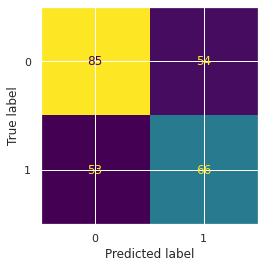

In [140]:
ConfusionMatrixDisplay.from_predictions(Y_test_RUS, Y_pred_kNN_RUS, colorbar=False)

### Support Vector Machine

In [141]:
support_vector_classifier_balanced_RUS = SVC()
support_vector_classifier_balanced_RUS.fit(X_train_RUS, Y_train_RUS)
support_vector_classifier_balanced_RUS.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [142]:
Y_pred_SVC_RUS = support_vector_classifier_balanced_RUS.predict(X_test_RUS)

In [143]:
Y_pred_SVC_RUS_train = support_vector_classifier_balanced_RUS.predict(X_train_RUS)
print('Accuracy of training data: ', accuracy_score(Y_train_RUS, Y_pred_SVC_RUS_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_RUS, Y_pred_SVC_RUS))

Accuracy of training data:  0.6679611650485436
Accuracy of testing data:  0.6511627906976745


In [144]:
print(classification_report(Y_test_RUS, Y_pred_SVC_RUS))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64       139
           1       0.60      0.73      0.66       119

    accuracy                           0.65       258
   macro avg       0.66      0.66      0.65       258
weighted avg       0.66      0.65      0.65       258



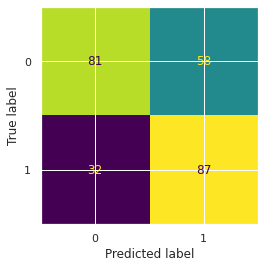

In [145]:
ConfusionMatrixDisplay.from_predictions(Y_test_RUS, Y_pred_SVC_RUS, colorbar=False)

### Naive Bayes

In [146]:
Gaussian_balanced_RUS = GaussianNB()
Gaussian_balanced_RUS.fit(X_train_RUS, Y_train_RUS)
Gaussian_balanced_RUS.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [147]:
Y_pred_Gaussian_RUS = Gaussian_balanced_RUS.predict(X_test_RUS)

In [148]:
Y_pred_Gaussian_RUS_train = Gaussian_balanced_RUS.predict(X_train_RUS)
print('Accuracy of training data: ', accuracy_score(Y_train_RUS, Y_pred_Gaussian_RUS_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_RUS, Y_pred_Gaussian_RUS))

Accuracy of training data:  0.5786407766990291
Accuracy of testing data:  0.6666666666666666


In [149]:
print(classification_report(Y_test_RUS, Y_pred_Gaussian_RUS))

              precision    recall  f1-score   support

           0       0.62      0.96      0.76       139
           1       0.87      0.33      0.48       119

    accuracy                           0.67       258
   macro avg       0.75      0.64      0.62       258
weighted avg       0.74      0.67      0.63       258



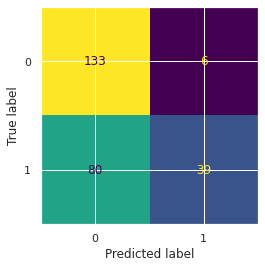

In [150]:
ConfusionMatrixDisplay.from_predictions(Y_test_RUS, Y_pred_Gaussian_RUS, colorbar=False)

### Logistic Regression

In [151]:
log_reg_balanced_RUS = LogisticRegression()
log_reg_balanced_RUS.fit(X_train_RUS, Y_train_RUS)
log_reg_balanced_RUS.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [152]:
Y_pred_log_reg_RUS = log_reg_balanced_RUS.predict(X_test_RUS)

In [153]:
Y_pred_log_reg_RUS_train = log_reg_balanced_RUS.predict(X_train_RUS)
print('Accuracy of training data: ', accuracy_score(Y_train_RUS, Y_pred_log_reg_RUS_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_RUS, Y_pred_log_reg_RUS))

Accuracy of training data:  0.6524271844660194
Accuracy of testing data:  0.6666666666666666


In [154]:
print(classification_report(Y_test_RUS, Y_pred_log_reg_RUS))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       139
           1       0.62      0.70      0.66       119

    accuracy                           0.67       258
   macro avg       0.67      0.67      0.67       258
weighted avg       0.67      0.67      0.67       258



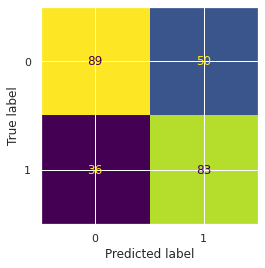

In [155]:
ConfusionMatrixDisplay.from_predictions(Y_test_RUS, Y_pred_log_reg_RUS, colorbar=False)

### Decision Tree Classifier

To prevent overfitting, we need to limit the parameter *max_depth*.

In [156]:
DT_classifier_balanced_RUS = DecisionTreeClassifier(random_state = 42, max_depth=5)
DT_classifier_balanced_RUS.fit(X_train_RUS, Y_train_RUS)
DT_classifier_balanced_RUS.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [157]:
Y_pred_DT_RUS = DT_classifier_balanced_RUS.predict(X_test_RUS)

In [158]:
Y_pred_DT_RUS_train = DT_classifier_balanced_RUS.predict(X_train_RUS)
print('Accuracy of training data: ', accuracy_score(Y_train_RUS, Y_pred_DT_RUS_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_RUS, Y_pred_DT_RUS))

Accuracy of training data:  0.6932038834951456
Accuracy of testing data:  0.5658914728682171


In [159]:
print(classification_report(Y_test_RUS, Y_pred_DT_RUS))

              precision    recall  f1-score   support

           0       0.68      0.37      0.48       139
           1       0.52      0.80      0.63       119

    accuracy                           0.57       258
   macro avg       0.60      0.58      0.55       258
weighted avg       0.61      0.57      0.55       258



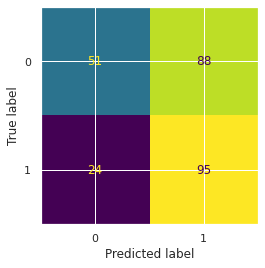

In [160]:
ConfusionMatrixDisplay.from_predictions(Y_test_RUS, Y_pred_DT_RUS, colorbar=False)

### Random Forest Classifier

In [161]:
RF_classifier_balanced_RUS = RandomForestClassifier(random_state = 42, max_depth = 5)
RF_classifier_balanced_RUS.fit(X_train_RUS, Y_train_RUS)
RF_classifier_balanced_RUS.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [162]:
Y_pred_RF_RUS = RF_classifier_balanced_RUS.predict(X_test_RUS)

In [163]:
Y_pred_RF_RUS_train = RF_classifier_balanced_RUS.predict(X_train_RUS)
print('Accuracy of training data: ', accuracy_score(Y_train_RUS, Y_pred_RF_RUS_train))
print('Accuracy of testing data: ', accuracy_score(Y_test_RUS, Y_pred_RF_RUS))

Accuracy of training data:  0.7291262135922331
Accuracy of testing data:  0.6666666666666666


In [164]:
print(classification_report(Y_test_RUS, Y_pred_RF_RUS))

              precision    recall  f1-score   support

           0       0.73      0.60      0.66       139
           1       0.61      0.75      0.67       119

    accuracy                           0.67       258
   macro avg       0.67      0.67      0.67       258
weighted avg       0.68      0.67      0.67       258



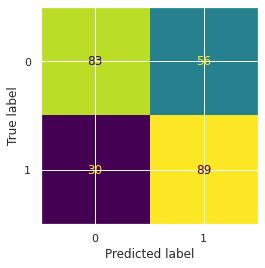

In [165]:
ConfusionMatrixDisplay.from_predictions(Y_test_RUS, Y_pred_RF_RUS, colorbar=False)

# ROC Curve

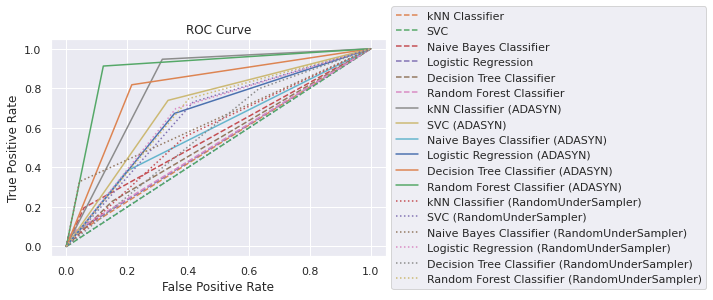

In [166]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr1, tpr1, '--', label='kNN Classifier')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_SVC)
plt.plot(fpr2, tpr2, '--', label='SVC')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_Gaussian)
plt.plot(fpr3, tpr3, '--', label='Naive Bayes Classifier')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_DT)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(y_test, y_pred_RF)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')

fpr7, tpr7, thresholds = roc_curve(Y_test, Y_pred_kNN)
plt.plot(fpr7, tpr7, '-', label='kNN Classifier (ADASYN)')
fpr8, tpr8, thresholds = roc_curve(Y_test, Y_pred_SVC)
plt.plot(fpr8, tpr8, '-', label='SVC (ADASYN)')
fpr9, tpr9, thresholds = roc_curve(Y_test, Y_pred_Gaussian)
plt.plot(fpr9, tpr9, '-', label='Naive Bayes Classifier (ADASYN)')
fpr10, tpr10, thresholds = roc_curve(Y_test, Y_pred_log_reg)
plt.plot(fpr10, tpr10, '-', label='Logistic Regression (ADASYN)')
fpr11, tpr11, thresholds = roc_curve(Y_test, Y_pred_DT)
plt.plot(fpr11, tpr11, '-', label='Decision Tree Classifier (ADASYN)')
fpr12, tpr12, thresholds = roc_curve(Y_test, Y_pred_RF)
plt.plot(fpr12, tpr12, '-', label='Random Forest Classifier (ADASYN)')

fpr13, tpr13, thresholds = roc_curve(Y_test_RUS, Y_pred_kNN_RUS)
plt.plot(fpr13, tpr13, ':', label='kNN Classifier (RandomUnderSampler)')
fpr14, tpr14, thresholds = roc_curve(Y_test_RUS, Y_pred_SVC_RUS)
plt.plot(fpr14, tpr14, ':', label='SVC (RandomUnderSampler)')
fpr15, tpr15, thresholds = roc_curve(Y_test_RUS, Y_pred_Gaussian_RUS)
plt.plot(fpr15, tpr15, ':', label='Naive Bayes Classifier (RandomUnderSampler)')
fpr16, tpr16, thresholds = roc_curve(Y_test_RUS, Y_pred_log_reg_RUS)
plt.plot(fpr16, tpr16, ':', label='Logistic Regression (RandomUnderSampler)')
fpr17, tpr17, thresholds = roc_curve(Y_test_RUS, Y_pred_DT_RUS)
plt.plot(fpr17, tpr17, ':', label='Decision Tree Classifier (RandomUnderSampler)')
fpr18, tpr18, thresholds = roc_curve(Y_test_RUS, Y_pred_RF_RUS)
plt.plot(fpr18, tpr18, ':', label='Random Forest Classifier (RandomUnderSampler)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

The ROC Curve drastically changes when balancing the dataset using Oversampling and Undersampling.

The ROC Curve is much better when oversampling techniques are applied on the dataset, as opposed to the undersampling techniques. Thus, it can be concluded that for this particular dataset, it is better to perform oversampling techniques to balance the dataset.